In [0]:
import numpy as np
import pandas as pd

In [0]:
df=pd.DataFrame()

In [0]:
df['hrs']=np.array([1,2.5,1.5,2.1,5,4,6.5,3.5,8,7.5])
df['marks']=np.array([37,50,43,60,27,80,30,75,64,56])

In [0]:
df

,hrs,marks
0,1.0,37
1,2.5,50
2,1.5,43
3,2.1,60
4,5.0,27
5,4.0,80
6,6.5,30
7,3.5,75
8,8.0,64
9,7.5,56


In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

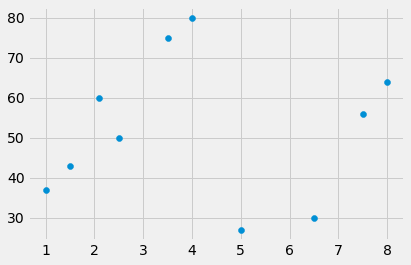

In [0]:
plt.scatter(df['hrs'],df['marks'])

In [0]:
# You have to find the first splitting criteria.

In [0]:
df.sort_values(by='hrs',inplace=True)

In [0]:
sse = pd.DataFrame(columns=['hrs','error'])

In [0]:
for i in range(df.shape[0]-1):
  m1 = (df['hrs'].values[i] + df['hrs'].values[i+1])/2
  df1 = df[df['hrs']<m1]
  df2 = df[df['hrs']>m1]
  
  df1_sse = 0
  df1_mean = df1['marks'].mean()
  for i in df1['marks']:
    df1_sse = df1_sse + (df1_mean-i)**2

  df2_sse = 0
  df2_mean = df2['marks'].mean()
  for i in df2['marks']:
    df2_sse = df2_sse + (df2_mean-i)**2
  temp = pd.DataFrame({'hrs':[m1], 'error':[(df1_sse+df2_sse)]})
  sse = sse.append(temp,ignore_index=True)

In [0]:
sse.sort_values(by='error')

,hrs,error
5,4.50,2534.250000
1,1.80,2583.500000
0,1.25,2698.888889
8,7.75,2800.888889
7,7.00,2803.500000
3,3.00,2808.333333
2,2.30,2824.380952
6,5.75,2934.857143
4,3.75,2949.200000


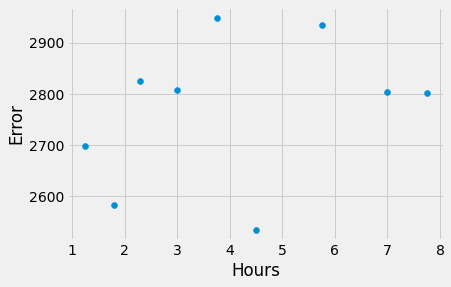

In [0]:
plt.scatter(sse['hrs'],sse['error'])
plt.xlabel('Hours')
plt.ylabel('Error')
plt.show()

## We can clearly see that minimum error is around 4.5 hours, So 4.5 should be the first spliting criteria.